# Basics of leaky-integrate-and-fire (LIF) neuron  






In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


In [4]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

## LIF model

$ \tau_m \frac{d}{dt}V(t) = E_L - V(t) + R.I(t) $, $\;\;\;\;$ if  $\;\;\;\;\;\;$  $V(t)<V_{th}$ <br> <br>
$ V(t)=V_{reset} $, $\;\;\;\;\;\;$  Otherwise <br><br>

In order to simulate the equation, we first discretize it: <br><br>

$V(t+1) = V(t) + \frac{\Delta t}{\tau_m}[E_L - V(t) + R.I(t)]$


0.15


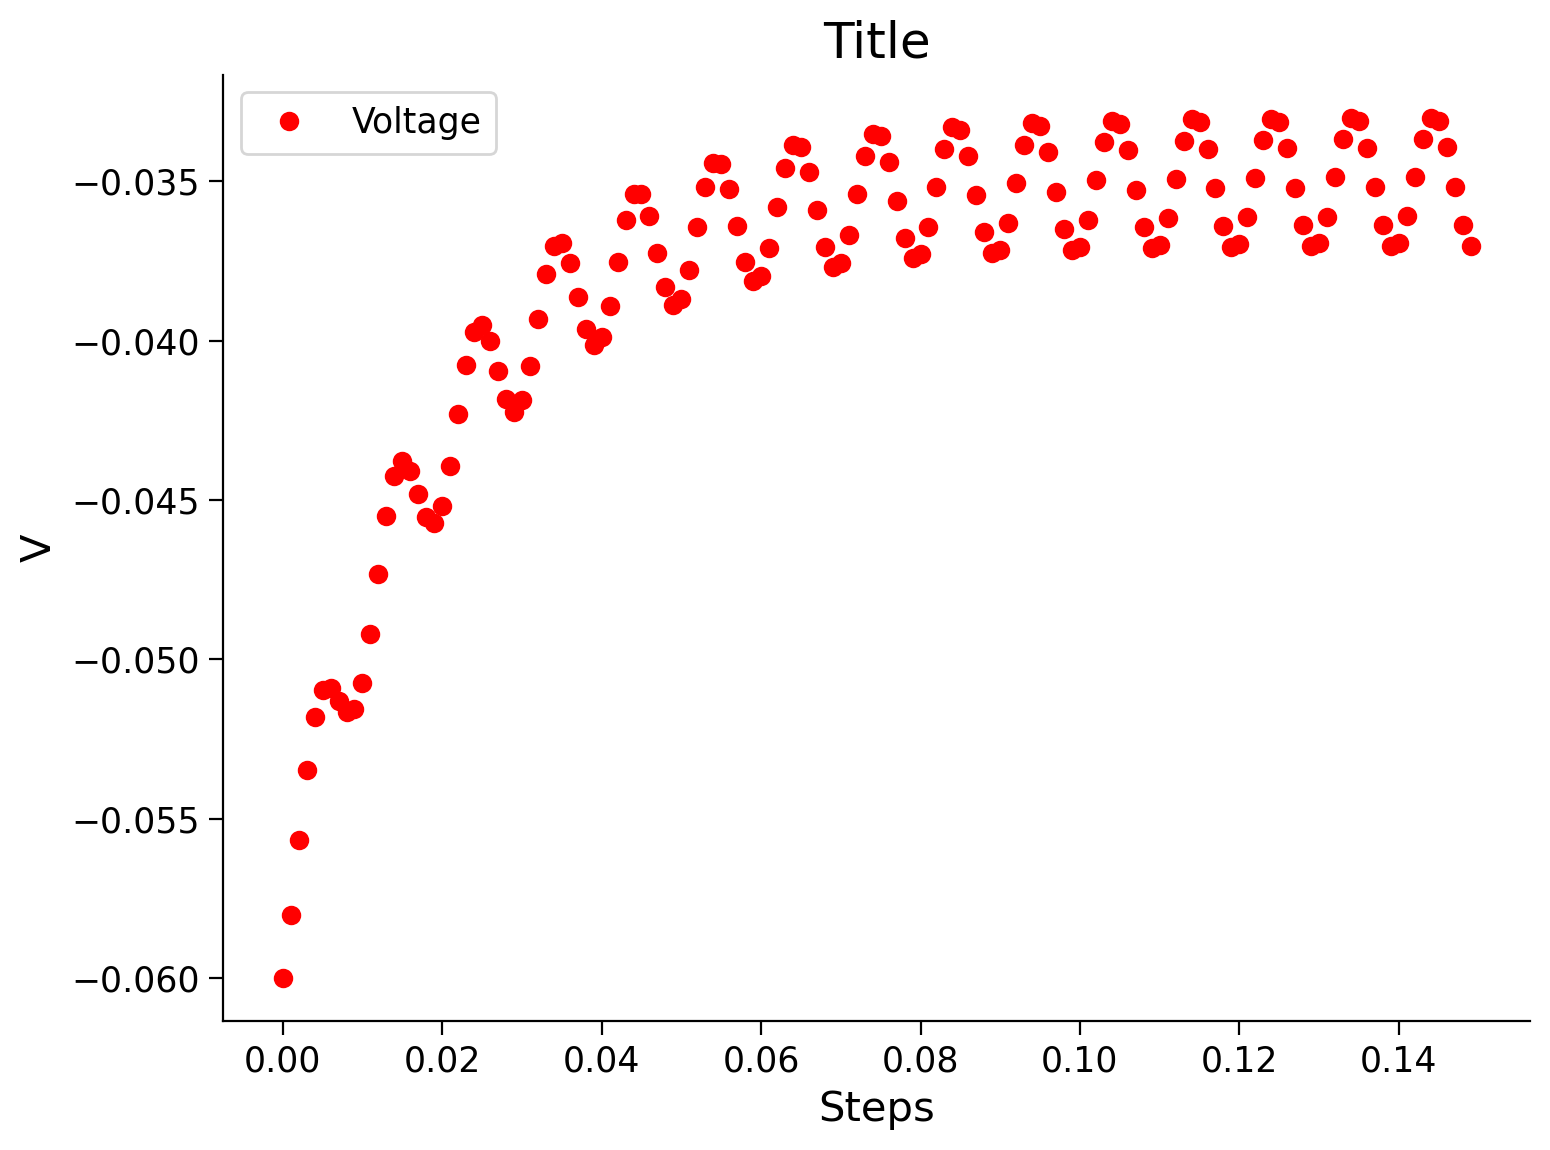

In [5]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere
print(t_max)


STEPS = int(t_max/dt)
V = np.zeros(STEPS)
t = np.zeros(STEPS)
# print(V)
V[0] = el
for step in range(STEPS-1):
    t[step+1] = (step+1) * dt
    I = i_mean * (1 + np.sin((t[step+1] * 2 * np.pi) / 0.01))
    V[step+1] = V[step] + (dt/tau)*(el - V[step] + r*I) 
    #print(f"{t:.3f}{V[step+1]:.3e}")  
    
plt.figure(1)
plt.title('Title')
plt.xlabel('Steps')
plt.ylabel('V')
plt.plot(t,V, 'ro' , label='Voltage')
plt.legend()
plt.show()

### Adding noise 

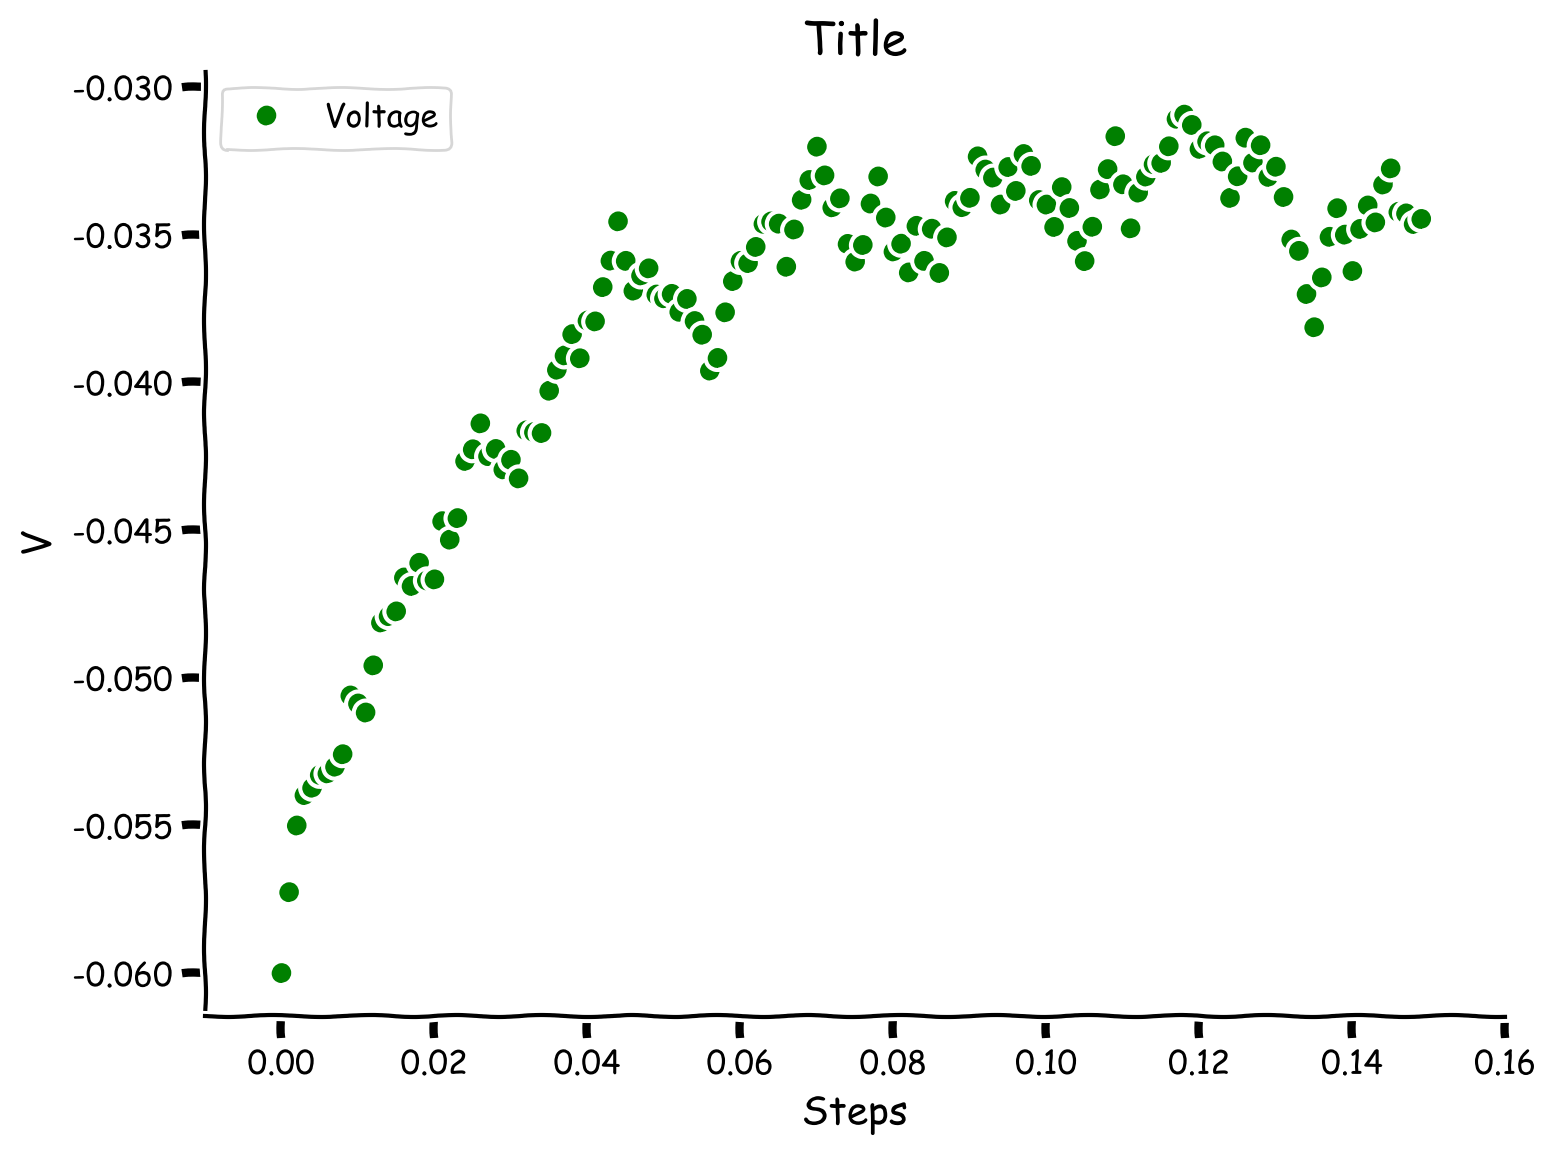

In [6]:
np.random.seed(2020)

STEPS = int(t_max/dt)
Randomness = np.random.uniform(-1,1,STEPS)
V = np.zeros(STEPS)
t = np.zeros(STEPS)
# print(V)
V[0] = el
for step in range(STEPS-1):
    t[step+1] = (step+1) * dt
    I = i_mean * (1 + .1*np.sqrt(t_max/dt)*Randomness[step])
    V[step+1] = V[step] + (dt/tau)*(el - V[step] + r*I) 
    #print(f"{t:.3f}{V[step+1]:.3e}")  
    
with plt.xkcd():
    plt.figure(2)
    plt.title('Title')
    plt.xlabel('Steps')
    plt.ylabel('V')
    plt.plot(t,V, 'go' , label='Voltage')
    plt.xlim(-.01, 0.16)
    plt.legend()
    plt.show()  
    
print(enumerate(t))    

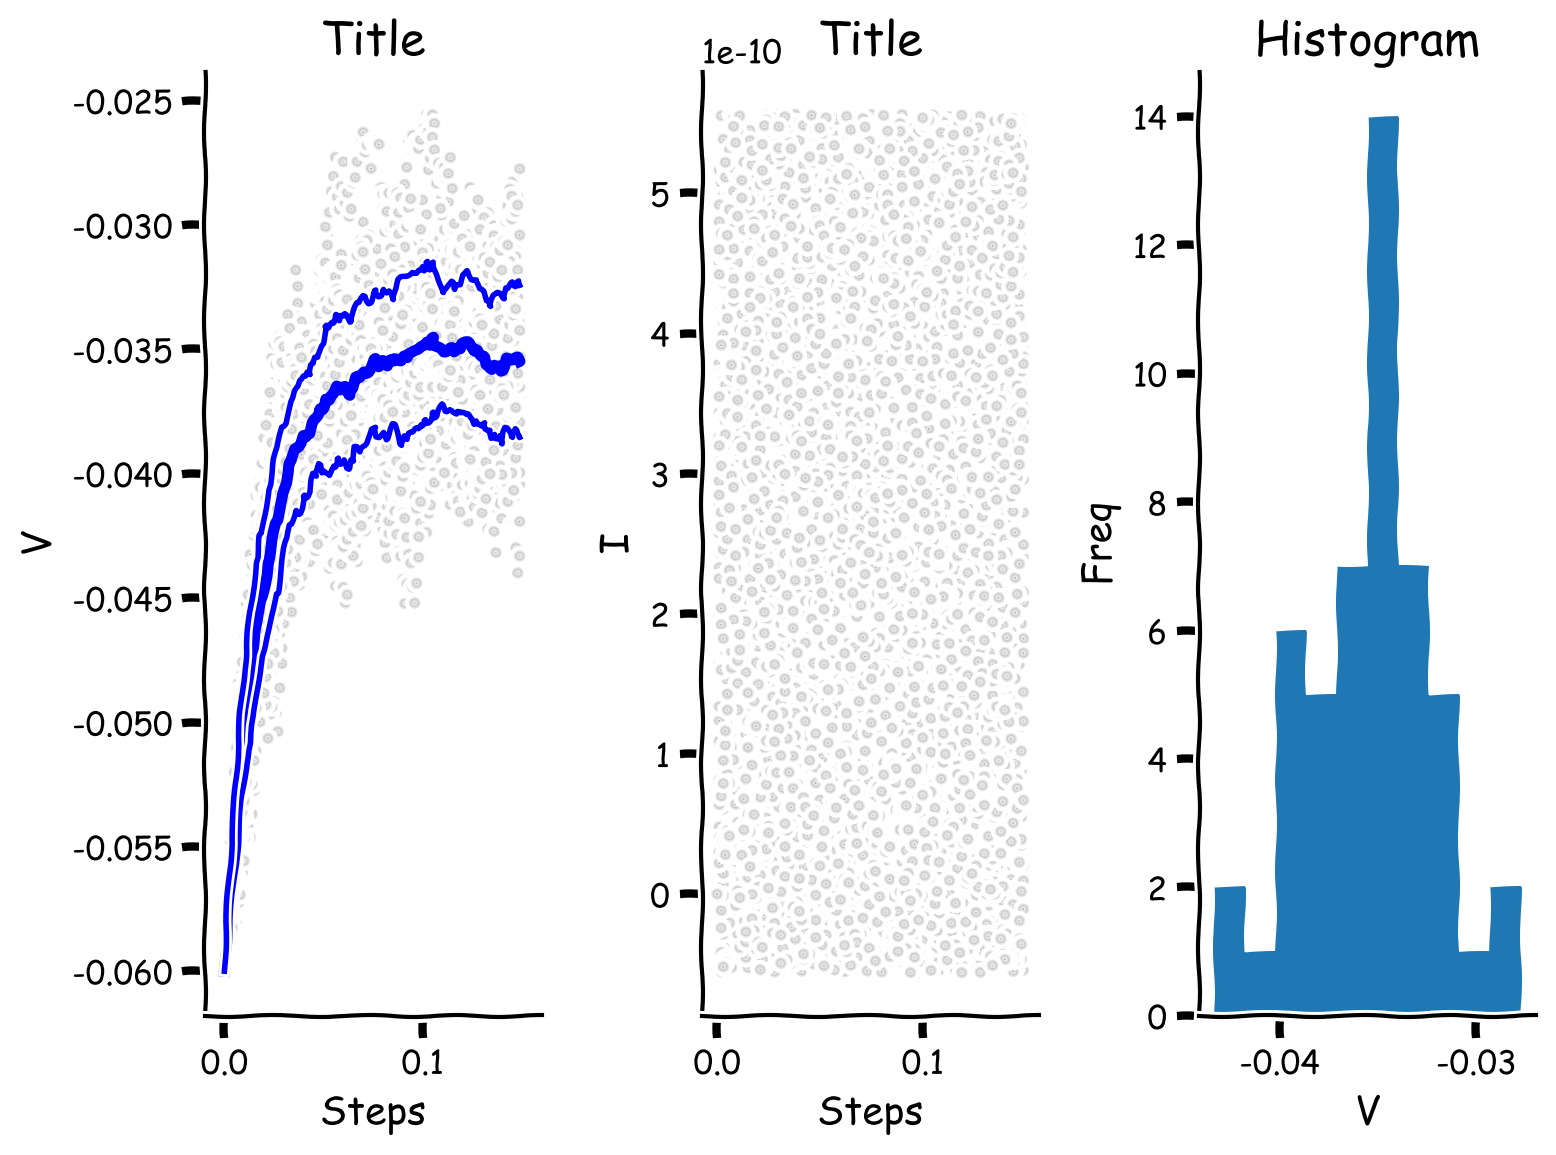

[-0.04331493 -0.04175796 -0.040201   -0.03864404 -0.03708707 -0.03553011
 -0.03397315 -0.03241619 -0.03085922 -0.02930226 -0.0277453 ]


In [7]:

t = np.arange(0,t_max,dt)
STEPS = np.size(t)
NumSimulations = 50
RAND = np.random.random([STEPS,NumSimulations])
V = el*np.ones([STEPS,NumSimulations])
I = np.zeros([STEPS,NumSimulations])


for step in range(STEPS-1):
    
        I[step+1,:] = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* RAND[step+1,:] - 1))
        V[step+1,:] = V[step,:] + (dt/tau)*(el - V[step,:] + r*I[step+1,:]) 
        #print(f"{t:.3f}{V[step+1]:.3e}")  
 
V_mean = np.mean(V,1);
V_stnd = np.std(V,1);

with plt.xkcd():
    plt.figure(3)
    plt.subplot(131)
    plt.title('Title')
    plt.xlabel('Steps')
    plt.ylabel('V')
    plt.plot(t,V,'k.' , label='Voltage', alpha=.1)
    plt.plot(t, V_mean , 'b' ,linewidth=4)
    plt.plot(t, V_mean-V_stnd , 'b' ,markersize=2)
    plt.plot(t, V_mean+V_stnd , 'b' ,markersize=2)    
    plt.xlim(-.01, 0.16)
    #plt.legend()
    
    plt.subplot(132)
    plt.title('Title')
    plt.xlabel('Steps')
    plt.ylabel('I')
    plt.plot(t,I,'k.' , label='Voltage', alpha=.1)
    
    plt.subplot(133)
    plt.title('Histogram')
    plt.xlabel('V')
    plt.ylabel('Freq')
    pdf_v , bins_v , patches_v = plt.hist(V[-1,:],10 , histtype='stepfilled' , linewidth=0)
    plt.show()
    
print (bins_v)



### Histogram 

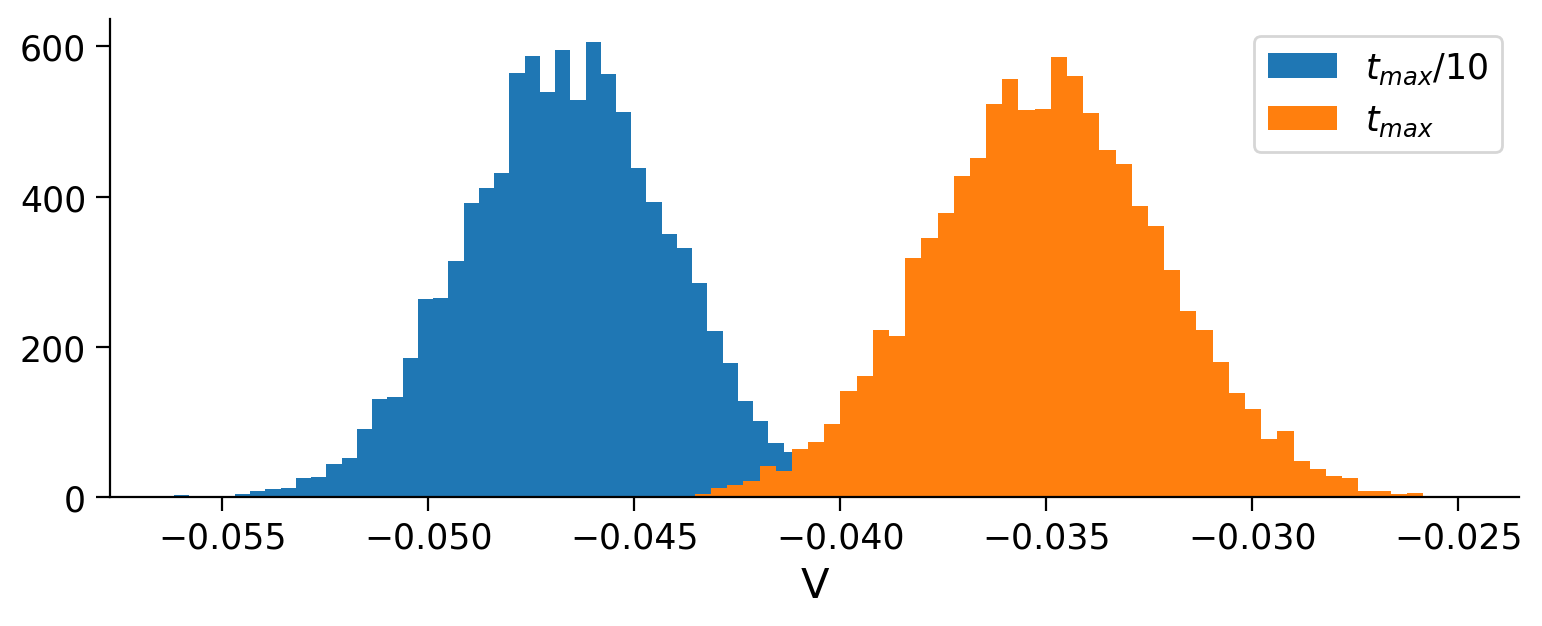

[[0.78212451 0.97397644 0.13913506 0.88673248 0.11473079]
 [0.1738408  0.06091035 0.01954096 0.35211897 0.88433262]
 [0.54433277 0.6699068  0.17146015 0.01090021 0.95573263]
 [0.82736246 0.88784563 0.5020442  0.62144012 0.8306329 ]]
[[ True  True False  True False]
 [False False False False  True]
 [ True  True False False  True]
 [ True  True  True  True  True]]


In [13]:
t = np.arange(0,t_max,dt)
STEPS = len(t)
NumSimulations = 10000
RAND = np.random.random([STEPS,NumSimulations])
V = el*np.ones([STEPS,NumSimulations])
I = np.zeros([STEPS,NumSimulations])


for step in range(STEPS-1):
    I[step+1,:] = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* RAND[step+1,:] - 1))
    V[step+1,:] = V[step,:] + (dt/tau)*(el - V[step,:] + r*I[step+1,:]) 
    #print(f"{t:.3f}{V[step+1]:.3e}")  

        
plt.figure()
plt.subplot(211)
plt.xlabel('V')
plt.hist(V[int(STEPS/10),:],50 , label='$t_{max}/10$')
plt.hist(V[-1,:],50 , label='$t_{max}$')
plt.legend()
plt.show()

# AA = np.random.random([4,5])
# print(AA)
# idx = AA>.5
# print(idx)



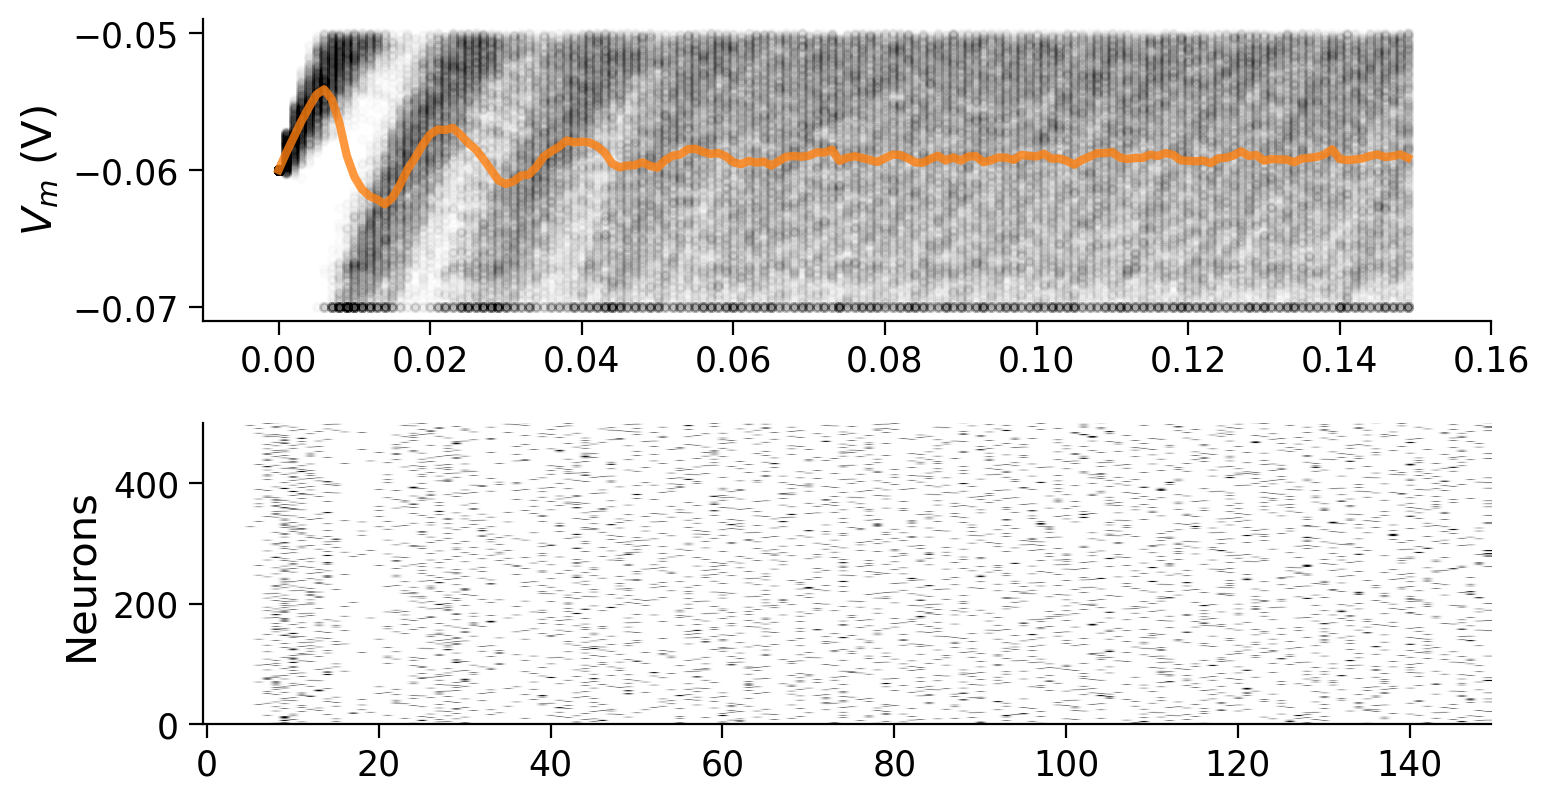

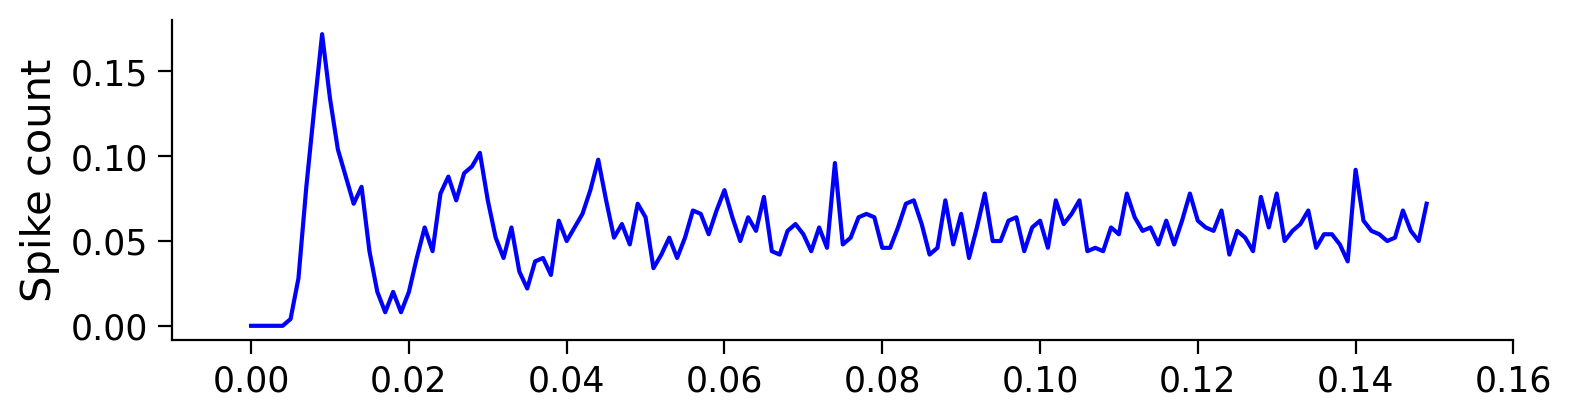

[[0.78552804 0.94164329 0.99221312 0.27163466 0.34865159]
 [0.50155726 0.89398735 0.57341772 0.72631905 0.77289742]
 [0.81680872 0.44493937 0.88925229 0.11828456 0.77149055]
 [0.90424917 0.77201583 0.04300564 0.30900727 0.87530015]]


In [11]:
# Set random number generator
np.random.seed(2020)

t = np.arange(0,t_max,dt)
STEPS = len(t)
Neurons = 500
RAND = np.random.random([STEPS,Neurons])
V = el*np.ones([STEPS,Neurons])
I = np.zeros([STEPS,Neurons])

    
# Initialize spikes and spikes_n
spikes = {j: [] for j in range(Neurons)}
spikes_n = np.zeros([STEPS])
raster = np.zeros([STEPS,Neurons])


for step in range(STEPS-1):
    I[step+1,:] = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* RAND[step+1,:] - 1))
    V[step+1,:] = V[step,:] + (dt/tau)*(el - V[step,:] + r*I[step+1,:]) 
    
    idx = V[step+1 , :]>=vth
    V[step+1 , idx] = vr
    raster[step+1 , idx] = 1;
    
    for j in np.where(idx)[0]:
        spikes[j] += [t[step]]
        spikes_n[step+1] += 1
    
    # # loop over neurons
    # for j in range(Neurons):
    #     if V[step+1 , j]>=vth: 
    #         V[step+1 , j] = vr
    #         spikes[j] += [t[step]]
    #         spikes_n[step+1] +=1
            

            
# Collect mean Vm and mean spiking rate
v_mean = np.mean(V, axis=1)
spikes_mean =  spikes_n / Neurons

# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(Neurons):
  plt.scatter(t, V[:,j], color="k", marker=".", alpha=0.01)
plt.plot(t, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')
plt.xlim(-.01, 0.16)
    

# ax2 = plt.subplot(3, 2, 3)    
# for j in range(Neurons):
#   plt.scatter(spikes[j] , j*np.ones(len(spikes[j])), color="b", marker=".",  alpha=0.1)
# plt.ylabel('Spike')
# plt.show()

ax4 = plt.subplot(3, 1, 2 )    
plt.imshow(np.transpose(raster), cmap='Greys', origin='lower', aspect='auto')
plt.ylabel('Neurons')
plt.show()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)    
plt.plot(t , spikes_n/Neurons, color="b" )
plt.ylabel('Spike count')
plt.show()






### Investigting the Refractory period
Here we add a refractory period of $t_{ref}=10ms$ to the neuron's $V_m$ where in this period the $V_m$ is clamped to $V_{rest}$.

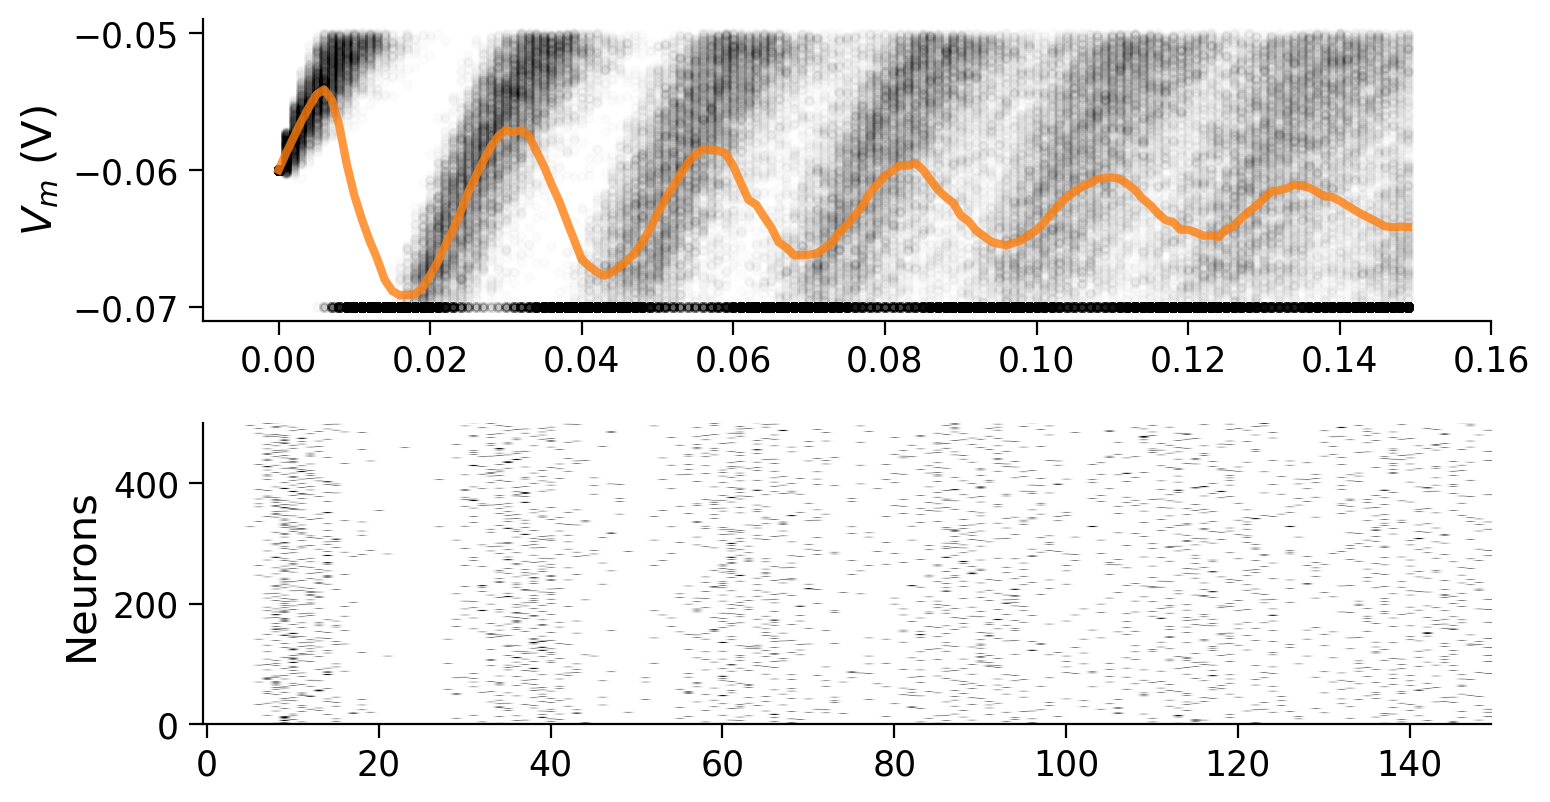

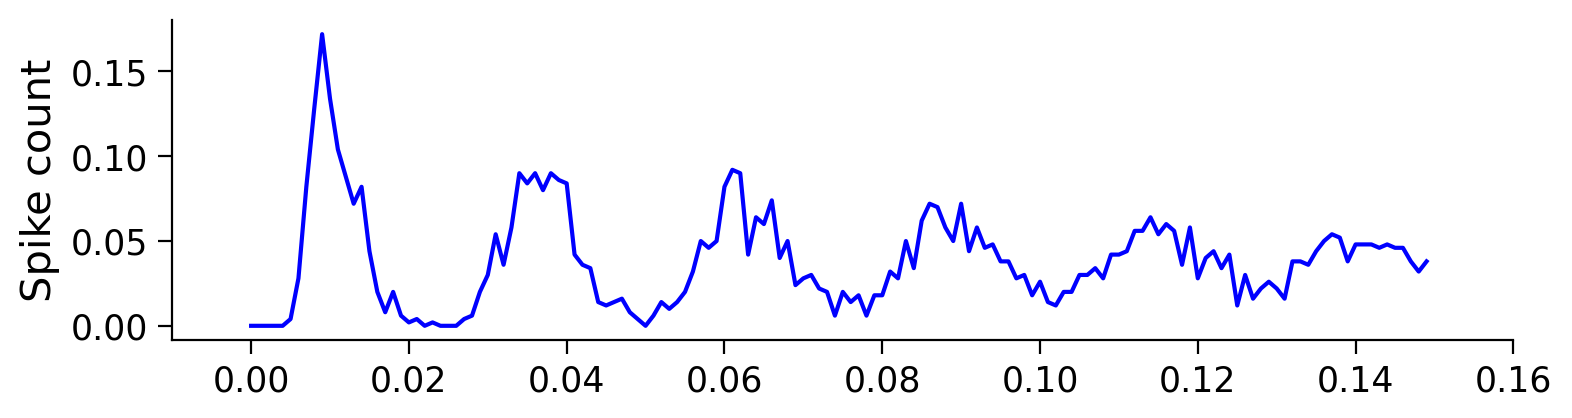

In [18]:
# Refractory period
t_ref = 10e-3
steps_ref = int(t_ref/dt)
np.random.seed(2020)



t = np.arange(0,t_max,dt)
STEPS = len(t)
Neurons = 500
RAND = np.random.random([STEPS,Neurons])
V = el*np.ones([STEPS,Neurons])
I = np.zeros([STEPS,Neurons])

    
# Initialize spikes and spikes_n
spikes = {j: [] for j in range(Neurons)}
spikes_n = np.zeros([STEPS])
raster = np.zeros([STEPS,Neurons])
clamped = np.zeros([STEPS,Neurons])


for step in range(STEPS-1):
    I[step+1,:] = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* RAND[step+1,:] - 1))
    V[step+1,:] = V[step,:] + (dt/tau)*(el - V[step,:] + r*I[step+1,:]) 
    
    idx = V[step+1 , :]>=vth
    raster[step+1 , idx] = 1;
    if step+1+steps_ref>STEPS:
        clamped[step+1:,idx]=1
    else:
        clamped[step+1:step+1+steps_ref,idx]=1
    
    idx_cl = clamped[step+1,:]==1
    V[step+1 , idx_cl] = vr
    
    
    for j in np.where(idx)[0]:
        spikes[j] += [t[step]]
        spikes_n[step+1] += 1
    
    
    # # loop over neurons
    # for j in range(Neurons):
    #     if V[step+1 , j]>=vth: 
    #         V[step+1 , j] = vr
    #         spikes[j] += [t[step]]
    #         spikes_n[step+1] +=1
            

            
# Collect mean Vm and mean spiking rate
v_mean = np.mean(V, axis=1)
spikes_mean =  spikes_n / Neurons

# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(Neurons):
  plt.scatter(t, V[:,j], color="k", marker=".", alpha=0.01)
plt.plot(t, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')
plt.xlim(-.01, 0.16)
    

# ax2 = plt.subplot(3, 2, 3)    
# for j in range(Neurons):
#   plt.scatter(spikes[j] , j*np.ones(len(spikes[j])), color="b", marker=".",  alpha=0.1)
# plt.ylabel('Spike')
# plt.show()

ax4 = plt.subplot(3, 1, 2 )    
plt.imshow(np.transpose(raster), cmap='Greys', origin='lower', aspect='auto')
plt.ylabel('Neurons')
plt.show()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)    
plt.plot(t , spikes_n/Neurons, color="b" )
plt.ylabel('Spike count')
plt.show()


Ran for 0.15s in 150 steps.


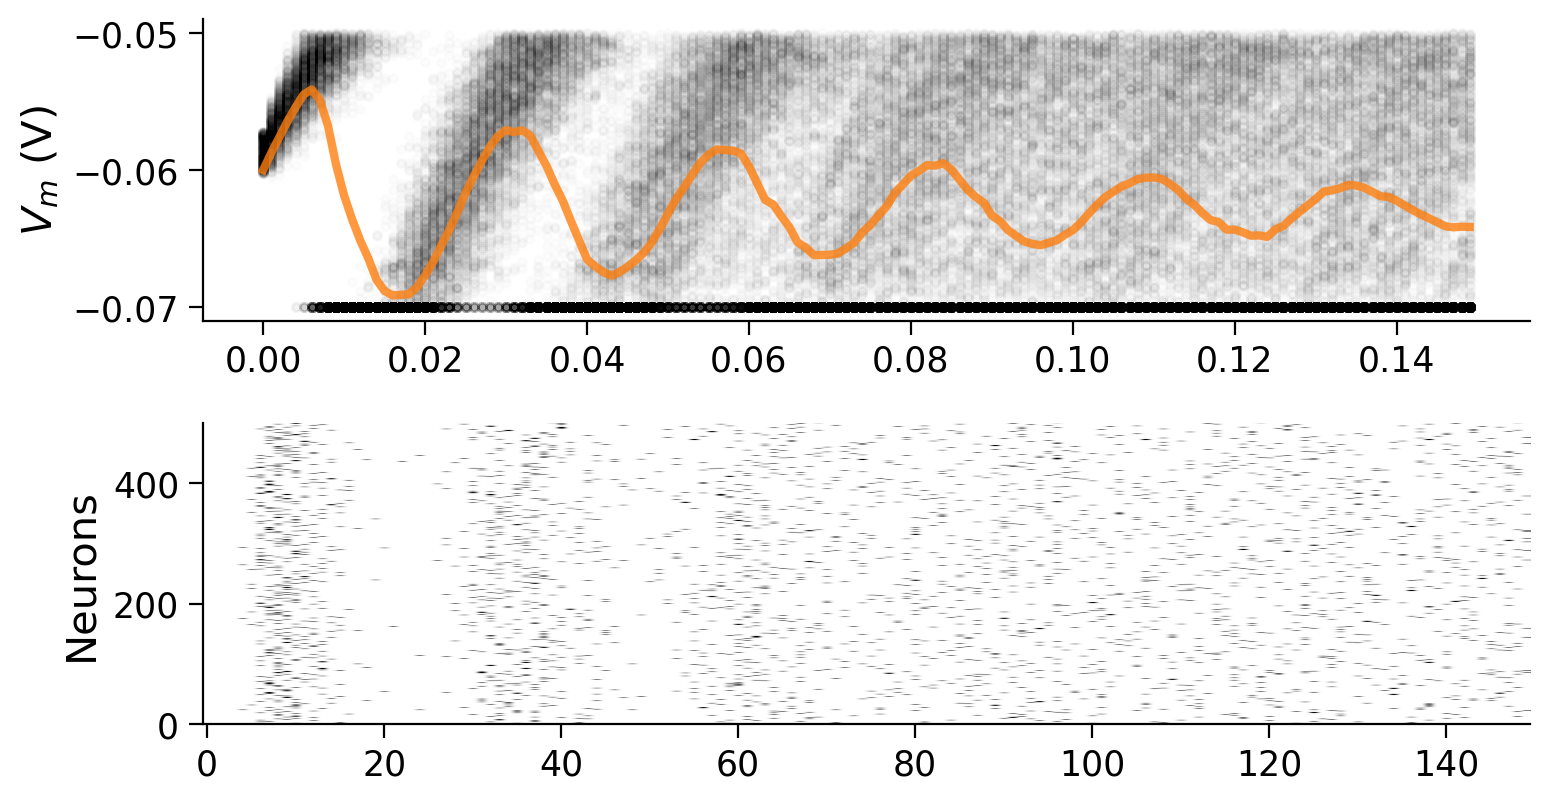

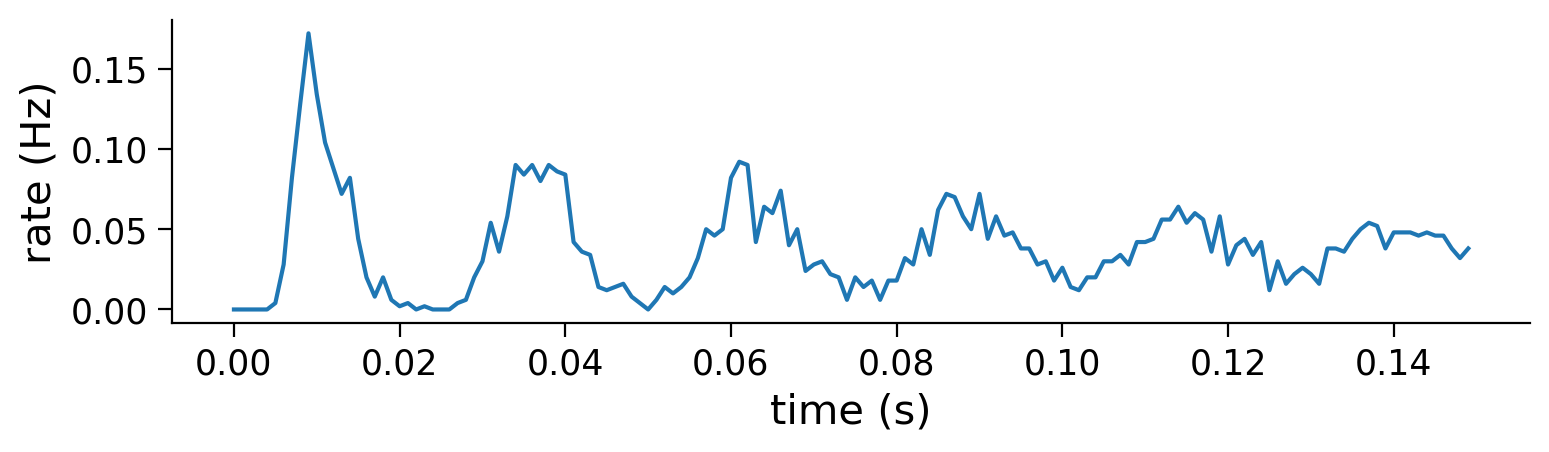

In [42]:
from LIFNeuron import LIFNeuron


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeuron(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

# Plot spikes
ax4 = plt.subplot(3, 1, 2 )    
plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')
plt.ylabel('Neurons')
plt.show()


# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()